### Sistema de recomendação em Python

Sistema de recomendação baseado no dataset MovieLens disponivel no link abaixo.


http://grouplens.org/datasets/movielens/1m/

Neste link temos outros datasets muito úteis para aprender mais sobre sistemas de recomendação. 

https://www.ieor.berkeley.edu/~goldberg/jester-data/
        

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
import plotly as py

#from surprise import Reader, Dataset, BaselineOnly, SVD, accuracy

warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
movies = pd.read_excel('Datasets/movies.xls')
users = pd.read_excel('Datasets/users.xls')
rating = pd.read_excel('Datasets/ratings.xls')
occupation = pd.read_excel('Datasets/occupation.xls')

In [3]:
dataset = pd.merge(movies, rating, left_on='MovieID', right_on='MovieID')

In [4]:
dataset = pd.merge(dataset, users, left_on='UserID', right_on='UserID')

In [5]:
dataset = pd.merge(dataset, occupation, left_on='Occupation', right_on='OccID')

#### EDA - Exploratory data analysis

##### Missing data in %

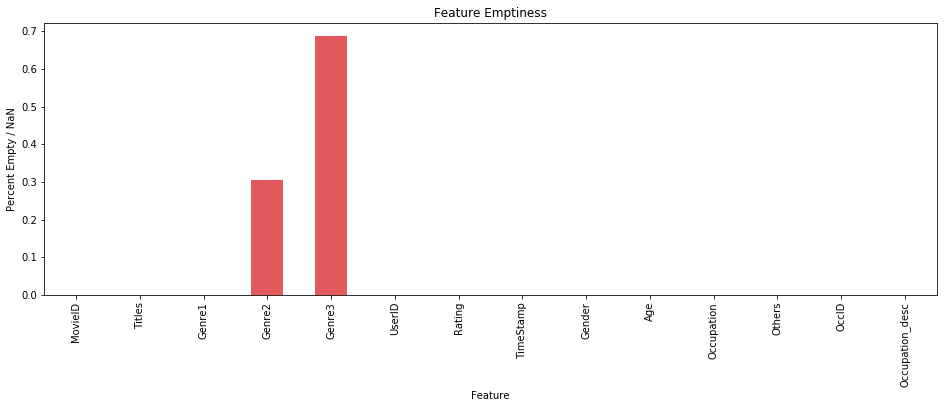

In [6]:
percentage_missing_data = dataset.isnull().sum() / dataset.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
plt.show()

##### Density Plot

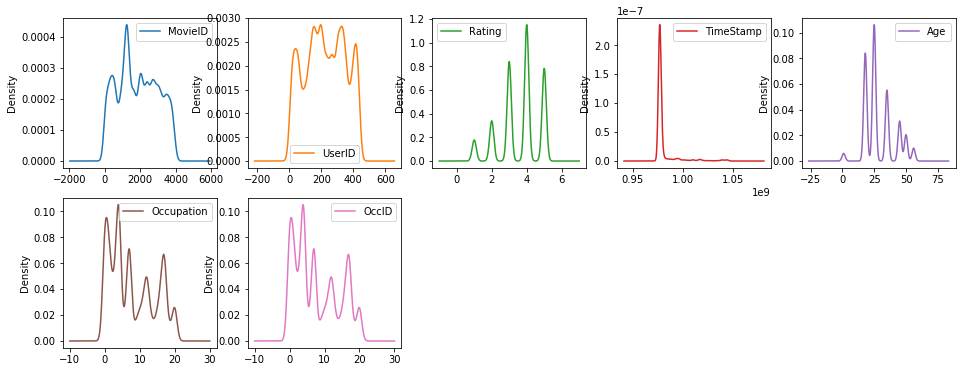

In [7]:
dataset.plot(kind='density',subplots=True,layout=(5,5), sharex=False, figsize=(16,16))
plt.show()

##### Bar plots by Rating 

In [8]:
dataset['Title_Year'] = dataset.Titles.str[-5:]
dataset['Title_Year'] = dataset.Title_Year.str[:-1]

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

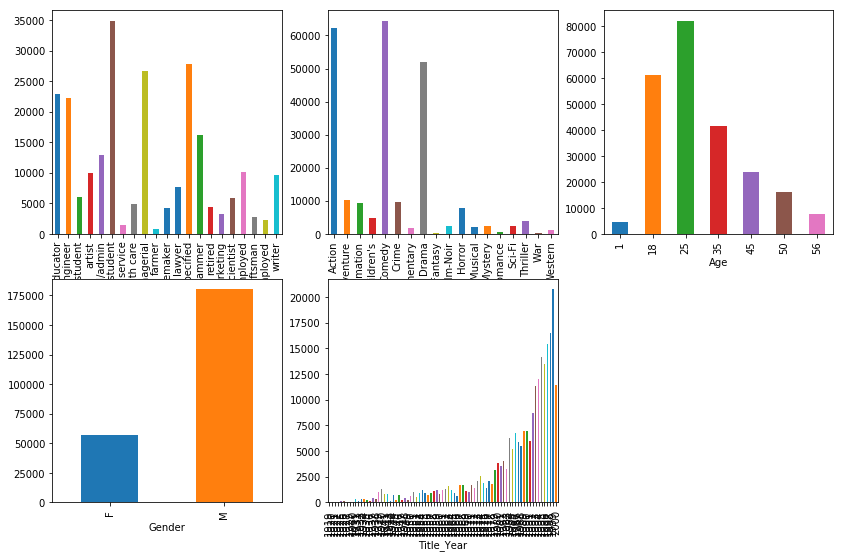

In [13]:
plt.figure(figsize=(14,14))

plt.subplot(331)
x = dataset.groupby(['Occupation_desc'])['Rating'].sum()
p1 = x.plot.bar()

plt.subplot(332)
y = dataset.groupby(['Genre1'])['Rating'].sum()
p2 = y.plot.bar()

plt.subplot(333)
w = dataset.groupby(['Age'])['Rating'].sum()
p3 = w.plot.bar()

plt.subplot(334)
s = dataset.groupby(['Gender'])['Rating'].sum()
p4 = s.plot.bar()

plt.subplot(335)
t = dataset.groupby(['Title_Year'])['Rating'].sum()
p5 = t.plot.bar()

plt.plot(p1, p2, p3, p4, p5)

plt.show()

##### Training model

In [ ]:
dataset.split(n_folds=3)

In [ ]:
model = BaselineOnly()
 
results = []
for train, val in data.folds():
 
    model.train(train)
    predictions = model.test(val)
 
    rmse = accuracy.rmse(predictions, verbose=True)
    results.append(rmse)
print('Mean RMSE %.5f' % (np.mean(results)) )

In [ ]:
model = SVD()
 
results = []
for train, val in data.folds():
 
    model.train(train)
    predictions = model.test(val)
 
    rmse = accuracy.rmse(predictions, verbose=True)
    results.append(rmse)
print('Mean RMSE %.5f' % (np.mean(results)) )